# Course Title: Data Analytics & Statistics in Python
## Metropolia University of Applied Sciences
## Week 3: Basic Statistics in Python
### Date: 19.3.2025

<table "<table style="width: 100%;">
  <tr>
    <td style="text-align: left; vertical-align: middle;">
      <ul style="list-style: none; padding-left: 0;">
        <li><strong>Instructor</strong>: Hamed Ahmadinia, Ph.D</li>
        <li><strong>Email</strong>: hamed.ahmadinia@metropolia.fi
        <li><strong>Web</strong>: www.ahmadinia.fi</li>          </li>
      </ul>
    </td>
  </tr>
</table>

## **1. Loading the Dataset**

### **Loading Medical Examination Dataset**  
We will load the **Medical Examination Dataset** from the provided GitHub URL. This dataset contains medical examination records, capturing health metrics such as blood pressure, cholesterol, glucose levels, and lifestyle habits (e.g., smoking, alcohol use).  
Let’s load the data and display the first few rows to understand its structure.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) # suppress mathematically undefined errors

# Import necessary libraries
import pandas as pd  # for handling tabular datasets
import numpy as np  # for numerical computations
from scipy import stats  # for statistical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for advanced statistical plots

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/medical_examination.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


### **Introduction to Statistics in Python**  

Python is one of the most popular languages for data analysis, thanks to its powerful libraries and ease of use. Here’s a quick overview of key libraries for statistical analysis:

- **NumPy**: Efficient for numerical computations with arrays, offering fast operations for statistics like `mean()`, `median()`, and `std()`.
- **Pandas**: Ideal for working with tabular data using **DataFrames**, providing methods for grouping, filtering, and aggregating data.
- **SciPy**: Extends NumPy for scientific computations, offering advanced statistical functions such as hypothesis testing and probability distributions.
- **Statistics module**: A core Python library for basic statistics like mean, median, mode, and variance—great for simple tasks.

Each library has its strengths:
- Use **NumPy** for fast numerical operations.
- Use **Pandas** for working with CSV files or databases.
- Use **SciPy** for specialized statistical analysis.
- Use **Statistics** for quick, simple calculations.

Knowing how and when to use these libraries can significantly improve your efficiency when woring with data.


### **2. Minimum and Maximum Values**

**Overview:**  
The **minimum** and **maximum** values of a dataset help you understand its range and identify potential outliers. These values are essential for:
- **Calculating range:** Helps quantify the spread of the dataset.
- **Data normalization:** Rescales data to standard ranges (e.g., 0 to 1).
- **Outlier detection:** Identifies unusually high or low values.
- **Setting axis limits:** Optimizes visualizations by adjusting axes.

---

### **Key Points about Min/Max:**
1. **Simple Operations:** Use Python’s built-in `min()` and `max()` functions to get the smallest and largest values from a list or set of numbers.
2. **Multiple Data Types:** You can use `min()` and `max()` for numbers, strings, or mixed data types (by defining a `key`).
3. **Handles Lists or Variables:** Works efficiently with both single values and arrays.

---

### *Here is an example of finding the maximum value among three numbers:

<div style="text-align: center;">
  <img src="https://images.surferseo.art/80a707b8-0280-472d-a112-4b91dab140ac.png" alt="Min Max Example" width="400">
</div>

---


In [ ]:
# 2.1 Using Lists and NumPy Arrays 

# Example: Calculate minimum and maximum of the weight column
weight_values = df["weight"].dropna().values  # Convert column to array
print(f"Minimum weight: {np.min(weight_values)}")
print(f"Maximum weight: {np.max(weight_values)}")

Minimum weight: 10.0
Maximum weight: 200.0


In [ ]:
# 2.2 Using DataFrames

# Min and Max of DataFrame columns
print("Minimum values in each column:")
print(df.min(numeric_only=True))

print("\nMaximum values in each column:")
print(df.max(numeric_only=True))

Minimum values in each column:
id                 0.0
age            10798.0
sex                1.0
height            55.0
weight            10.0
ap_hi           -150.0
ap_lo            -70.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             0.0
cardio             0.0
dtype: float64

Maximum values in each column:
id             99999.0
age            23713.0
sex                3.0
height           250.0
weight           200.0
ap_hi          16020.0
ap_lo          11000.0
cholesterol        3.0
gluc               3.0
smoke              1.0
alco               1.0
active             1.0
cardio             1.0
dtype: float64


### **3. Means of Values**

**Overview:**  
The **mean** is a measure of **central tendency** that summarizes the average value of a dataset. Depending on the data's characteristics, there are different types of means that provide unique insights:

1. **Arithmetic Mean:** The most common type, calculated by summing all values and dividing by the number of observations.
2. **Geometric Mean:** Useful for data involving rates of change (e.g., investment growth), calculated by multiplying values and taking the $n$-th root.
3. **Harmonic Mean:** Ideal for datasets involving ratios or rates (e.g., speeds), emphasizing smaller values.
4. **Weighted Mean:** Accounts for the relative importance or weights of observations.

---

### **Key Points about Means:**
- **Arithmetic Mean:** Gives equal weight to all values; however, it can be influenced by outliers.
- **Geometric Mean:** Avoids distortions from compounding effects and better represents proportional changes.
- **Harmonic Mean:** Minimizes the impact of large values and emphasizes smaller values, often used in rates.
- **Weighted Mean:** Provides a more accurate representation when different data points have different levels of significance.

---

### **Formulas and Mathematical Examples:**

#### **1. Arithmetic Mean (Average)**  
**Formula:**  
$$ \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $$  
Where:
- $\bar{x}$ = arithmetic mean  
- $x_i$ = each individual value  
- $n$ = total number of values  

**Example:**  
Consider the dataset: **[10, 20, 30, 40, 50]**  
$$ \bar{x} = \frac{10 + 20 + 30 + 40 + 50}{5} = \frac{150}{5} = 30 $$  

---

#### **2. Geometric Mean**  
**Formula:**  
$$ \text{GM} = \left( \prod_{i=1}^{n} x_i \right)^{\frac{1}{n}} $$  
Where:
- $\text{GM}$ = geometric mean  
- $x_i$ = each individual value  
- $n$ = total number of values  

**Example:**  
Consider the dataset: **[2, 8, 4]**  
$$ \text{GM} = \left( 2 \times 8 \times 4 \right)^{\frac{1}{3}} = \left( 64 \right)^{\frac{1}{3}} = 4 $$  

---

#### **3. Harmonic Mean**  
**Formula:**  
$$ \text{HM} = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}} $$  
Where:
- $\text{HM}$ = harmonic mean  
- $x_i$ = each individual value  
- $n$ = total number of values  

**Example:**  
Consider the dataset: **[60, 30]** (e.g., a trip where you travel 60 km/h outbound and 30 km/h return)  
$$ \text{HM} = \frac{2}{\frac{1}{60} + \frac{1}{30}} = \frac{2}{\frac{1}{60} + \frac{2}{60}} = \frac{2}{\frac{3}{60}} = \frac{2 \times 60}{3} = 40 $$  

---

#### **4. Weighted Mean**  
**Formula:**  
$$ \bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i} $$  
Where:
- $\bar{x}_w$ = weighted mean  
- $w_i$ = weight of each value  
- $x_i$ = each individual value  
- $n$ = total number of values  

**Example:**  
Consider the values: **[90, 80, 70]** with corresponding weights: **[3, 2, 1]**  
$$ \bar{x}_w = \frac{(3 \times 90) + (2 \times 80) + (1 \times 70)}{3 + 2 + 1} = \frac{270 + 160 + 70}{6} = \frac{500}{6} \approx 83.33 $$  

---

### **Summary:**  
- The **arithmetic mean** is the simple average.  
- The **geometric mean** is better for growth rates and multiplicative processes.  
- The **harmonic mean** is useful for averages involving rates (e.g., speed).  
- The **weighted mean** adjusts for the relative importance of each value.
rates (e.g., speed).  
- The **weighted mean** adjusts for the relative importance of each value.


In [ ]:
# 3.1 Arithmetic Mean

# Calculate the mean height
mean_height = df["height"].mean()
print(f"Arithmetic Mean of Height: {mean_height:.2f} cm")

Arithmetic Mean of Height: 164.36 cm


In [ ]:
# 3.2 Geometric Mean

# Calculate the geometric mean of height
geometric_mean_height = stats.gmean(df["height"].dropna())
print(f"Geometric Mean of Height: {geometric_mean_height:.2f} cm")

Geometric Mean of Height: 164.15 cm


In [ ]:
# 3.3 Harmonic Mean

# Calculate the harmonic mean of systolic blood pressure (ap_hi)
harmonic_mean_ap_hi = stats.hmean(df["ap_hi"][df["ap_hi"] > 0])  # Exclude non-positive values
print(f"Harmonic Mean of Systolic Blood Pressure: {harmonic_mean_ap_hi:.2f}")

Harmonic Mean of Systolic Blood Pressure: 121.69


In [ ]:
# 3.4 Weighted Mean

# Calculate weighted mean weight based on age
weights = df["age"]
weighted_mean_weight = np.average(df["weight"], weights=weights)
print(f"Weighted Mean of Weight (by age): {weighted_mean_weight:.2f} kg")

Weighted Mean of Weight (by age): 74.30 kg


### **4. Median and Mode**

**Overview:**  
The **median** and **mode** are both measures of **central tendency**, but they summarize data differently:  

- **Median:** The middle value when the data is sorted.  
- **Mode:** The most frequently occurring value(s) in the dataset.

---

### **1. Median**

**Definition:**  
The **median** is the value that separates the dataset into two equal halves. If the number of observations is **odd**, the median is the middle value. If the number of observations is **even**, the median is the average of the two middle values.

**Formula:**  
For sorted data:  
- If $n$ (number of data points) is **odd**:  
  $$ \text{Median} = x_{\left( \frac{n+1}{2} \right)} $$  
- If $n$ is **even**:  
  $$ \text{Median} = \frac{x_{\left( \frac{n}{2} \right)} + x_{\left( \frac{n}{2} + 1 \right)}}{2} $$  

**Example 1 (Odd dataset):**  
Dataset: **[5, 7, 12, 20, 25]** (sorted)  
- $n = 5$ (odd)  
- Median = $12$ (middle value)

**Example 2 (Even dataset):**  
Dataset: **[10, 15, 20, 25]** (sorted)  
- $n = 4$ (even)  
- Median = $\frac{15 + 20}{2} = 17.5$

---

### **2. Mode**

**Definition:**  
The **mode** is the value that occurs **most frequently** in a dataset. A dataset can have:
- **No mode**: All values occur only once.
- **Unimodal**: One mode (most frequent value).
- **Bimodal**: Two modes.
- **Multimodal**: More than two modes.

**Example 1 (Unimodal):**  
Dataset: **[3, 1, 4, 4, 2]**  
- Mode = **4** (occurs twice)

**Example 2 (Bimodal):**  
Dataset: **[10, 15, 20, 10, 20]**  
- Modes = **10** and **20** (both occur twice)

**Example 3 (No mode):**  
Dataset: **[1, 2, 3, 4, 5]**  
- No mode (each value occurs once).

---

### **Summary:**  
- The **median** provides a better central value in the presence of outliers compared to the mean.
- The **mode** is useful for identifying he most common value(s) in categorical and numerical data.


In [ ]:
# 4.1 Median

# Calculate median BMI
median_bmi = np.median(df["weight"] / ((df["height"] / 100) ** 2))
print(f"Median BMI: {median_bmi:.2f}")

Median BMI: 26.37


In [ ]:
# 4.2 Mode

# Calculate the mode of cholesterol levels
mode_cholesterol = stats.mode(df["cholesterol"], keepdims=True)
print(f"Most Common Cholesterol Level: {mode_cholesterol.mode[0]}, Count: {mode_cholesterol.count[0]}")

Most Common Cholesterol Level: 1, Count: 52385


### **5. Quantiles and Interquartile Range (IQR)**

**Overview:**  
- **Quantiles** divide a dataset into equal-sized intervals. Common quantiles include:
  - **Quartiles**: Divide data into four equal parts (Q1, Q2, Q3).
  - **Deciles**: Divide data into ten equal parts.
  - **Percentiles**: Divide data into 100 equal parts.
- The **Interquartile Range (IQR)** is the range between the **first quartile (Q1)** and the **third quartile (Q3)**, showing the spread of the middle 50% of the data.

---

### **1. Quantiles**

**Definition:**  
- **Q1 (25th percentile)**: The value below which 25% of the data falls.  
- **Q2 (50th percentile or median)**: The value below which 50% of the data falls.  
- **Q3 (75th percentile)**: The value below which 75% of the data falls.

**Example:**  
Dataset: **[5, 7, 12, 15, 18, 22, 25]** (sorted)  
- **Q1**: Value at 25% → **7**  
- **Q2 (Median)**: Value at 50% → **15**  
- **Q3**: Value at 75% → **22**

---

### **2. Interquartile Range (IQR)**

**Definition:**  
The **Interquartile Range (IQR)** measures the spread of the middle 50% of the data and is calculated as:  
$$ \text{IQR} = Q3 - Q1 $$  

**Formula:**  
$$ \text{IQR} = Q3 - Q1 $$

**Example:**  
- **Q3**: 22  
- **Q1**: 7  
- **IQR**: $22 - 7 = 15$

---

### **3. Significance of IQR and Quantiles:**
- **IQR** is robust to outliers and provides a clear picture of the spread of the middle 50% of data.
- **Boxplots** visualize IQR and help detect potential outliers:
  - Points below $Q1 - 1.5 \times \text{IQR}$ or above $Q3 + 1.5 \times \text{IQR}$ are considered outliers.

---

**Summary:**  
- Quantiles help divide and interpret data distributions.
- IQR provides a measure of variability, highlighting the concentration of most data points.


Q1 (25th percentile of weight): 65.00
Q3 (75th percentile of weight): 82.00
Interquartile Range (IQR) of weight: 17.00


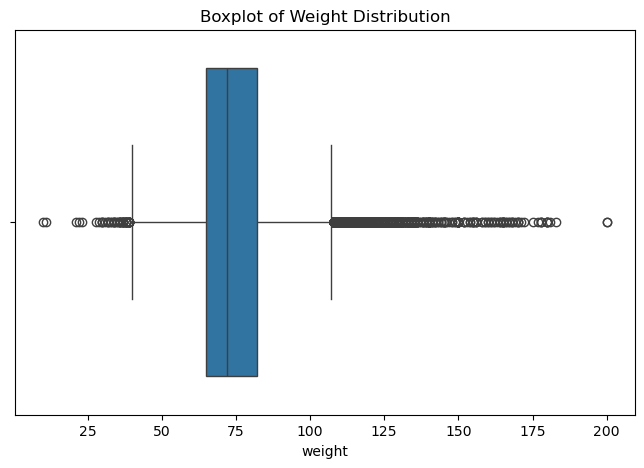

In [ ]:
# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR for weight
q1_weight = df["weight"].quantile(0.25)
q3_weight = df["weight"].quantile(0.75)
iqr_weight = q3_weight - q1_weight

print(f"Q1 (25th percentile of weight): {q1_weight:.2f}")
print(f"Q3 (75th percentile of weight): {q3_weight:.2f}")
print(f"Interquartile Range (IQR) of weight: {iqr_weight:.2f}")

# Visualize IQR using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["weight"])
plt.title("Boxplot of Weight Distribution")
plt.show()